In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 8))
%matplotlib inline
plt.rc('figure', figsize=(10, 6))
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import mglearn
import sklearn
import seaborn as sns
import graphviz

In [5]:
from sklearn.datasets import load_iris

In [6]:
iris_datasets = load_iris()

In [7]:
iris_datasets

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [8]:
iris_datasets.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [9]:
iris_df = pd.DataFrame(iris_datasets['data'], columns=iris_datasets['feature_names'])

In [10]:
iris_df['target'] = iris_datasets['target']

In [11]:
map_target = {0:'setosa', 1:'versicolor', 2:'virginica'}

In [12]:
iris_df['target_name'] = map(map_target.get, iris_df['target'])

In [13]:
del iris_df['target_name']

In [14]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
# check shape of data
iris_df.shape
print('The dataset has %d columns \n\t\t%d samples' % (iris_df.shape[1], iris_df.shape[0]))

The dataset has 5 columns 
		150 samples


In [16]:
# check null value
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [17]:
# Check targe value
iris_df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

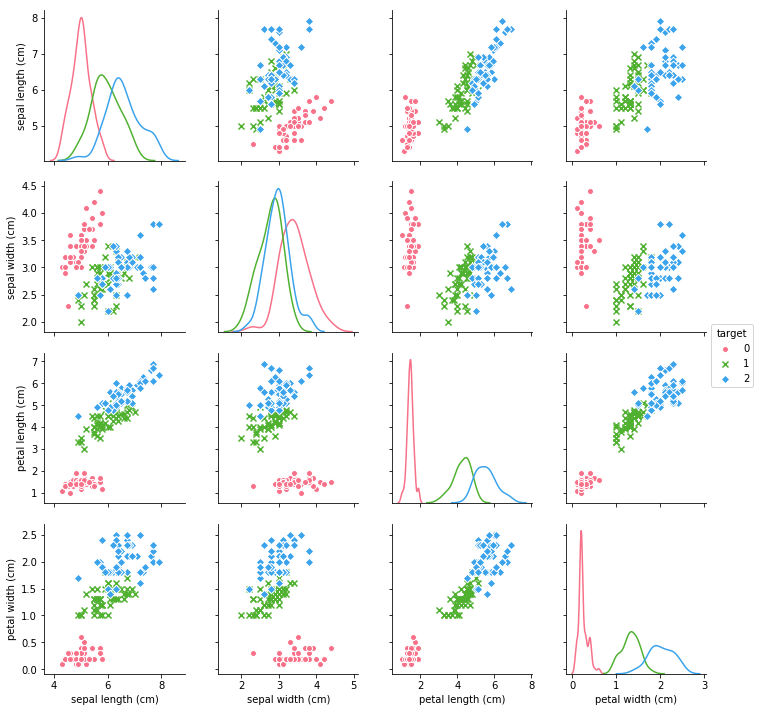

In [18]:
# plot pair plot
iris_df_data = iris_df.drop(columns='target')
iris_df_target = iris_df['target']

sns.pairplot(iris_df, vars= ['sepal length (cm)', 'sepal width (cm)','petal length (cm)', 'petal width (cm)'],
             hue='target',palette='husl',markers=['o','x','D'],diag_kind='kde')

In [19]:
# From the pairplot, we can see, target 0 has small petal length and width. It seems like a pretty good indicator of 
# separating target 0 to others. targe 2 seems like have long petal length and width.

# I think decision tree could be a good model to use with additional benefit of easy understanding

In [20]:
from sklearn import tree

In [21]:
clf = tree.DecisionTreeClassifier()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(iris_df_data, iris_df_target)

In [23]:
print('The shape of X_train is: {}'.format(X_train.shape))
print('The shape of X_test is: {}'.format(X_test.shape))
print('The shape of y_train is: {}'.format(y_train.shape))
print('The shape of y_test is: {}'.format(y_test.shape))

The shape of X_train is: (112, 4)
The shape of X_test is: (38, 4)
The shape of y_train is: (112,)
The shape of y_test is: (38,)


In [24]:
clf_learn = clf.fit(X_train, y_train)

In [42]:
y_pred = clf_learn.predict(X_test)

In [52]:
print('Prediction accuracy is: {}'.format(sklearn.metrics.accuracy_score(y_test, y_pred)))

Prediction accuracy is: 0.9736842105263158


In [26]:
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render('iris')

'iris.pdf'

In [39]:
dot_data = tree.export_graphviz(clf, out_file=None,
                        feature_names=list(iris_df.columns)[:4],
                         class_names=['setosa', 'versicolor', 'virginica'],
                         filled=True, rounded=True,
                         special_characters=True)

In [40]:
graph = graphviz.Source(dot_data)

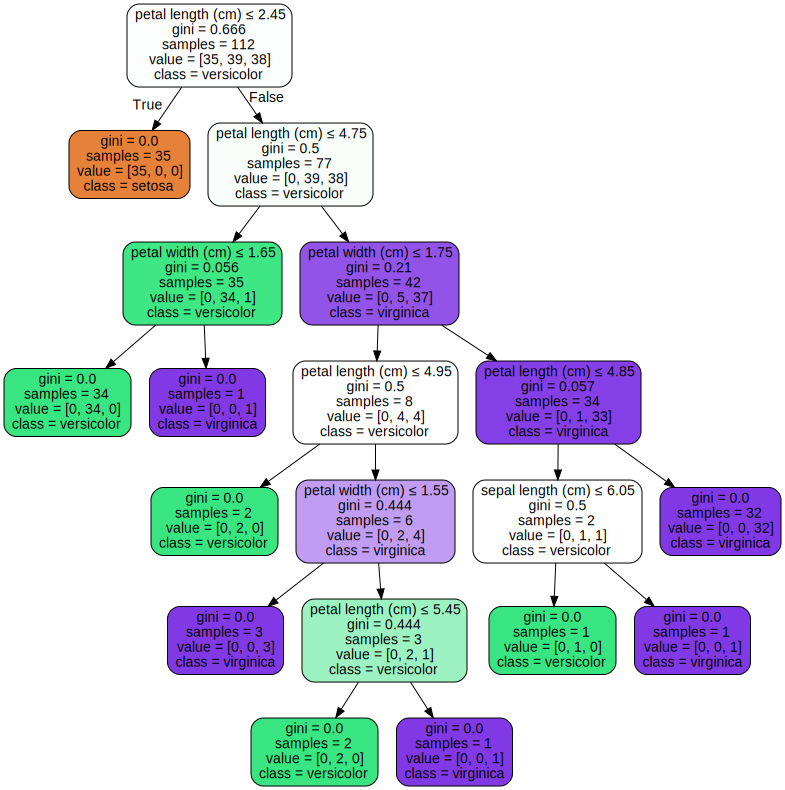

In [41]:
graph

## Plot the decision surface of a decision tree on the iris dataset

In [54]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

Automatically created module for IPython interactive environment


In [55]:
# parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

In [61]:
iris = load_iris()


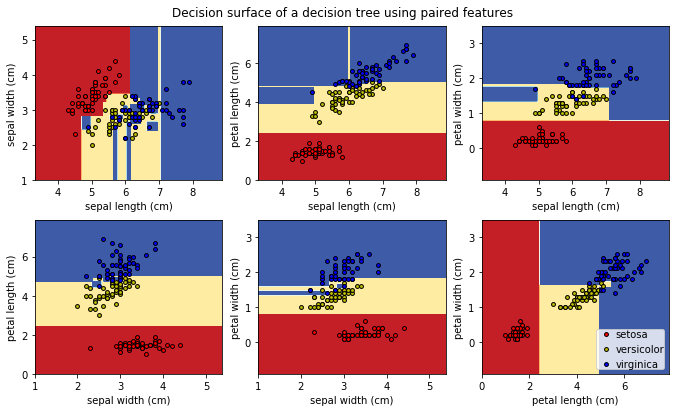

In [70]:
for pair_idx, pair in enumerate([[0,1], [0,2], [0,3],
                               [1,2], [1,3], [2,3]]):
    # we only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target
    
    # Train
    clf = DecisionTreeClassifier().fit(X,y)
    
    # Plot the decision boundary
    plt.subplot(2,3, pair_idx + 1)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()
    